# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$
    \nabla_{w}Q(w) = \dfrac{-2}{\ell} \left(X \right)^T \left( y - Xw \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [65]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [67]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [68]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [69]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

никнейм: erlegotkina@edu.hse.ru

VanillaGradientDescent: https://contest.yandex.ru/contest/54610/run-report/95918814/

StochasticDescent: https://contest.yandex.ru/contest/54610/run-report/95918908/

MomentumDescent: https://contest.yandex.ru/contest/54610/problems/C/

Adam: https://contest.yandex.ru/contest/54610/problems/D/

LinearRegression: https://contest.yandex.ru/contest/54610/problems/E/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [71]:
data = pd.read_csv('autos.csv')

In [72]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [73]:
#отнесем бинарные признаки к категориальными, так как их тоже необходимо обработать при помощи OHE
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

<function matplotlib.pyplot.show(close=None, block=None)>

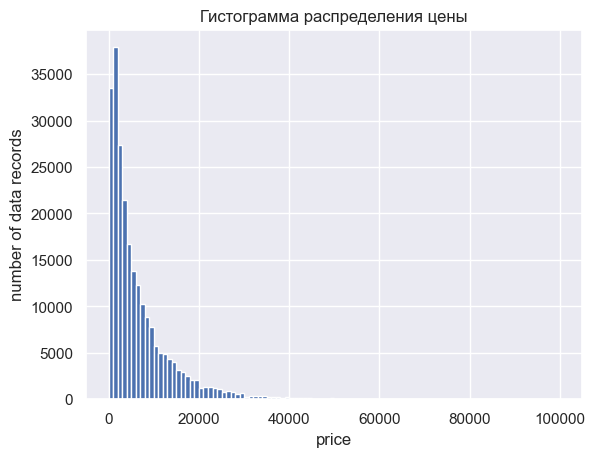

In [74]:
plt.hist(data['price'].values, bins=100)
plt.xlabel('price')
plt.ylabel('number of data records')
plt.title('Гистограмма распределения цены')
plt.show

В целом график достаточно информативен. Нельзя сказать, что у распределения тяжелые хвосты, но можно заметить выбросы с аномально большой ценой. График чем-то напоминает экспоненциальное распределение. Не будем заменять целевую переменную на логарифм.

<function matplotlib.pyplot.show(close=None, block=None)>

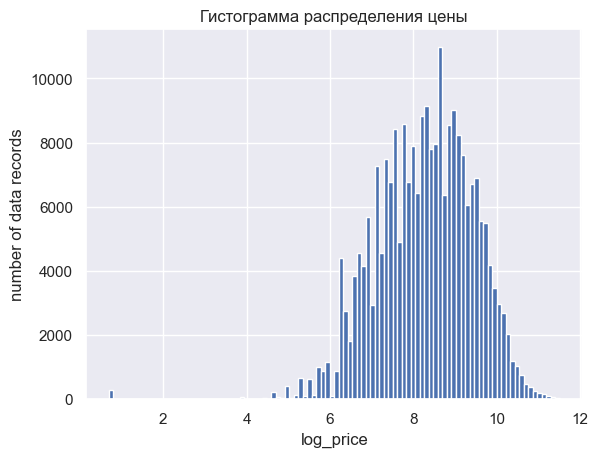

In [75]:
#посмотрим на логарифм
data['log_price'] = np.log1p(data['price'])
plt.hist(data['log_price'].values, bins=100)
plt.xlabel('log_price')
plt.ylabel('number of data records')
plt.title('Гистограмма распределения цены')
plt.show

Продолжим работу с логарифмом цены, так как это приблизит распределение целевой переменной к нормальном, что упростит модель и, возможно, мысможем получить более высокое качество.

In [76]:
#удалим выбросы по правилу 1.5IQR
q75, q25 = np.percentile(data['log_price'], [75 ,25])
iqr = q75 - q25
Q_1=data['log_price'].quantile(0.25)
Q_3=data['log_price'].quantile(0.75)
data_clean = data[(data['log_price'] >= Q_1-1.5*iqr) & (data['log_price'] <= Q_3+1.5*iqr)]

In [77]:
data.shape

(241190, 11)

In [78]:
data_clean.shape

(240399, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

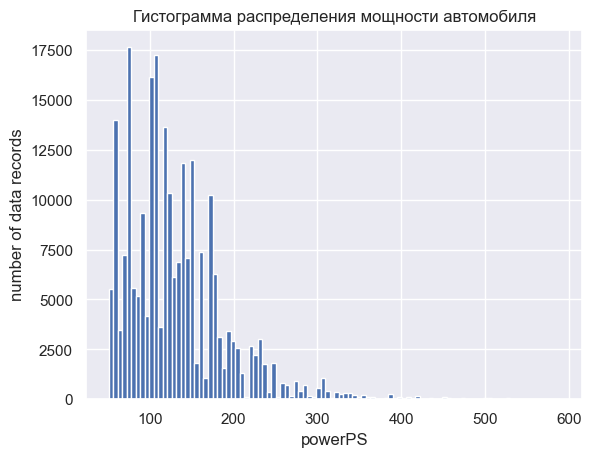

In [79]:
#посмотрим на графики распределений вещественных признаков
plt.hist(data_clean['powerPS'].values, bins=100)
plt.xlabel('powerPS')
plt.ylabel('number of data records')
plt.title('Гистограмма распределения мощности автомобиля')
plt.show

На графике видно, что есть наблюдения с очень большими значениями мощности, обработаем выбросы. Удалим по правилу 1,5IQR.

In [80]:
q75, q25 = np.percentile(data_clean['powerPS'], [75 ,25])
iqr = q75 - q25
Q_1=data_clean['powerPS'].quantile(0.25)
Q_3=data_clean['powerPS'].quantile(0.75)
data_clean = data_clean[(data_clean['powerPS'] >= Q_1-1.5*iqr) & (data_clean['powerPS'] <= Q_3+1.5*iqr)]

<function matplotlib.pyplot.show(close=None, block=None)>

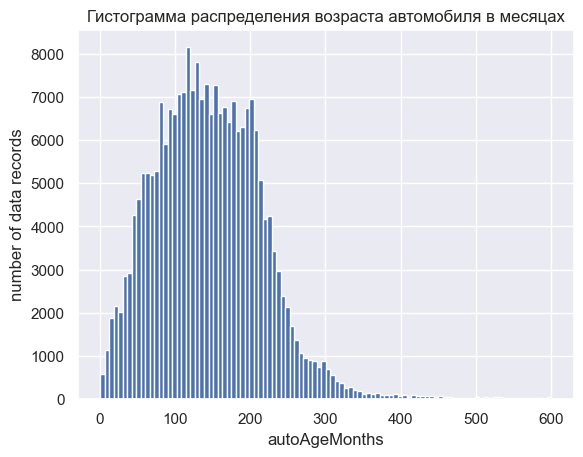

In [81]:
plt.hist(data_clean['autoAgeMonths'].values, bins=100)
plt.xlabel('autoAgeMonths')
plt.ylabel('number of data records')
plt.title('Гистограмма распределения возраста автомобиля в месяцах')
plt.show

Здесь также видно наличие автомобилей с очень большим возрастом. В выборке встречаются наблюдения с возрастом авто 500 - 600 месяцев. Скорее всего, это выбросы, так как автомобили, которым 40 - 50 лет Удалим выбросы справа по правилу 1.5IQR.

In [82]:
q75, q25 = np.percentile(data_clean['autoAgeMonths'], [75 ,25])
iqr = q75 - q25
Q_3=data_clean['autoAgeMonths'].quantile(0.75)
Q_1=data_clean['autoAgeMonths'].quantile(0.25)
data_clean = data_clean[(data_clean['autoAgeMonths'] >= Q_1-1.5*iqr) & (data_clean['autoAgeMonths'] <= Q_3+1.5*iqr)]

<function matplotlib.pyplot.show(close=None, block=None)>

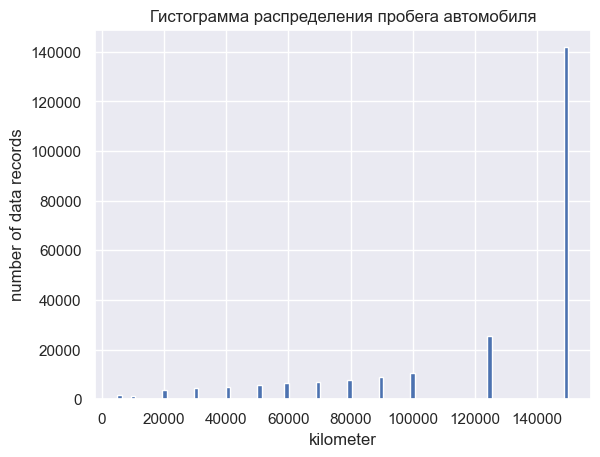

In [83]:
plt.hist(data_clean['kilometer'].values, bins=100)
plt.xlabel('kilometer')
plt.ylabel('number of data records')
plt.title('Гистограмма распределения пробега автомобиля')
plt.show

In [84]:
#снова удалим выбросы
q75, q25 = np.percentile(data_clean['kilometer'], [75 ,25])
iqr = q75 - q25
Q_3=data_clean['kilometer'].quantile(0.75)
Q_1=data_clean['kilometer'].quantile(0.25)
data_clean = data_clean[(data_clean['kilometer'] >= Q_1-1.5*iqr) & (data_clean['kilometer'] <= Q_3+1.5*iqr)]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

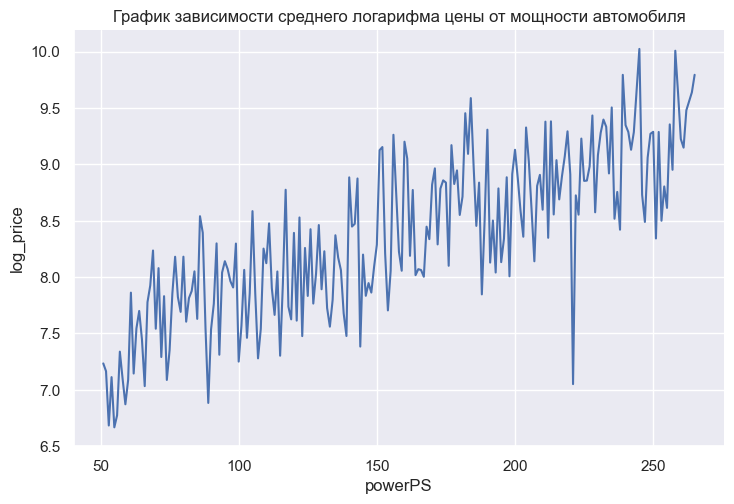

In [85]:
plt.figure(figsize = (12,8))
sns.relplot(
    data= pd.DataFrame(data_clean.groupby('powerPS')['log_price'].mean()), kind = 'line',
    x= 'powerPS', y = 'log_price', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарифма цены от мощности автомобиля')
plt.xlabel("powerPS")
plt.ylabel("log_price")
plt.show

На графике видно, что с ростом мощности автомобиля увеличивается его цена. Нельзя сказать, что зависимость линейная, но, вероянтно это признак все равно будет полезен для построения модели, так как мы можем наблюдать его положительную взаимосвязь с целевой переменной.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

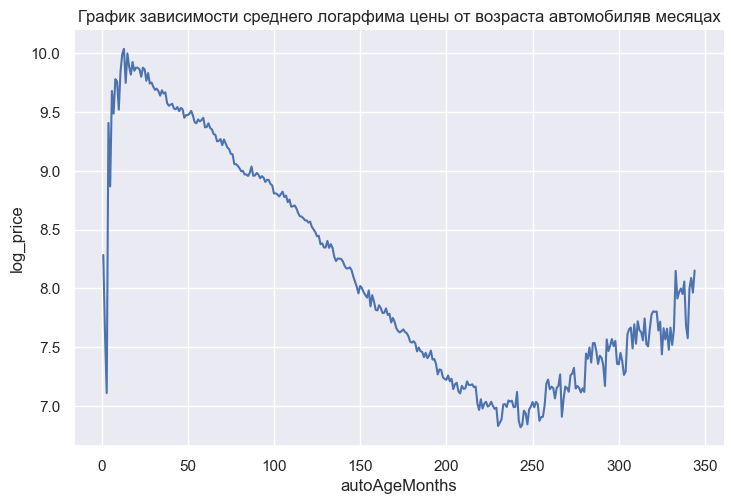

In [86]:
plt.figure(figsize = (12,8))
sns.relplot(
    data= pd.DataFrame(data_clean.groupby('autoAgeMonths')['log_price'].mean()), kind = 'line',
    x= 'autoAgeMonths', y = 'log_price', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарфима цены от возраста автомобиляв месяцах')
plt.xlabel("autoAgeMonths")
plt.ylabel("log_price")
plt.show

Этот признак имеет нелинейную взаимосвязь с целевой переменной. Вероятно, было бы более корректно разбить его на три по порогу. Первый интервал - отрезок, где цена возрастает, второй - где убывает, третий - снова возрастает.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

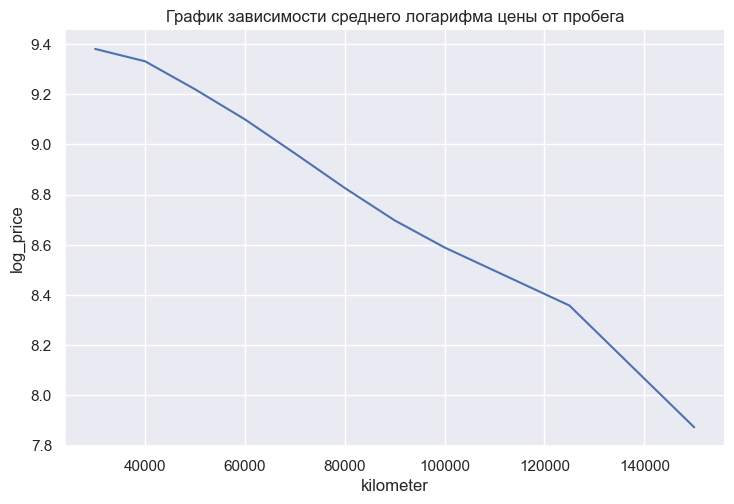

In [87]:
plt.figure(figsize = (12,8))
sns.relplot(
    data= pd.DataFrame(data_clean.groupby('kilometer')['log_price'].mean()), kind = 'line',
    x= 'kilometer', y = 'log_price', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарифма цены от пробега')
plt.xlabel("kilometer")
plt.ylabel("log_price")
plt.show

Здесь наблюдается практически прямая обратная взаимосвязь между признаком и целевой переменной. Этот признак будет полезен для построения модели.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

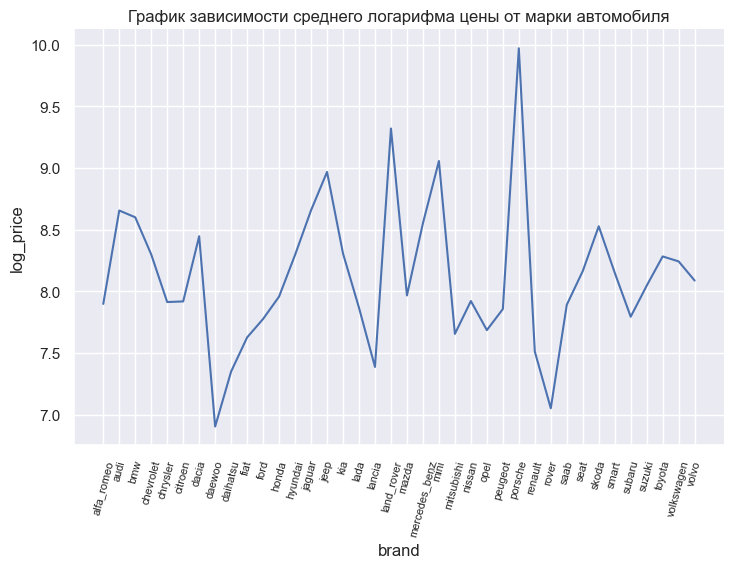

In [88]:
#посмотрим на категориальные признаки
plt.figure(figsize = (12,8))
sns.relplot(
    data= pd.DataFrame(data_clean.groupby('brand')['log_price'].mean()), kind = 'line',
    x= 'brand', y = 'log_price', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарифма цены от марки автомобиля')
plt.xlabel("brand")
plt.ylabel("log_price")
lab = sorted(set(data_clean['brand'].values))
plt.xticks(np.arange(38),
           labels=lab,
           fontsize=8,
           rotation=75)
plt.show

Здесь мы можем наблюдать, что цена зависит от марки автомобиля. Этот признак полезен для создания модели.

In [89]:
len(sorted(set(data_clean['model'].values)))

246

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

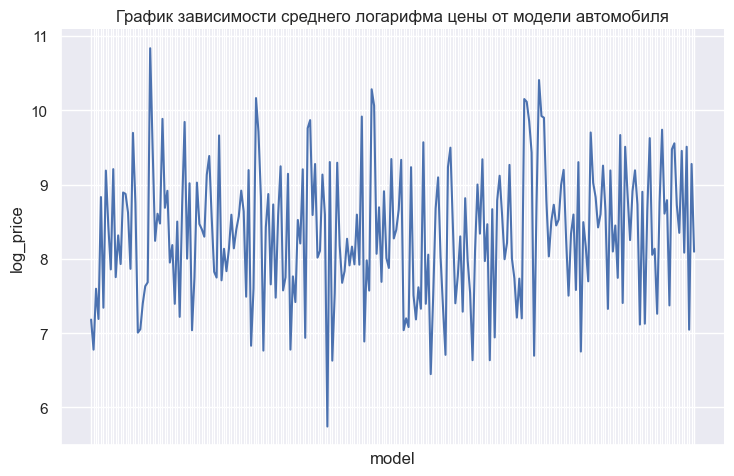

In [90]:
plt.figure(figsize = (12,8))
sns.relplot(
    data= pd.DataFrame(data_clean.groupby('model')['log_price'].mean()), kind = 'line',
    x= 'model', y = 'log_price', height = 5, aspect = 1.5)
plt.title('График зависимости среднего логарифма цены от модели автомобиля')
plt.xlabel("model")
plt.ylabel("log_price")
plt.tick_params (
 labelleft= True ,
 labelbottom= False )
plt.show

Моделей автомобилей очень много, поэтому сложно сделать вывод по графику (поэтому нет подписей, их слишком много - 244). Лучше рассматривать этот признак вместе с признаком 'марка автомобиля'.

<function matplotlib.pyplot.show(close=None, block=None)>

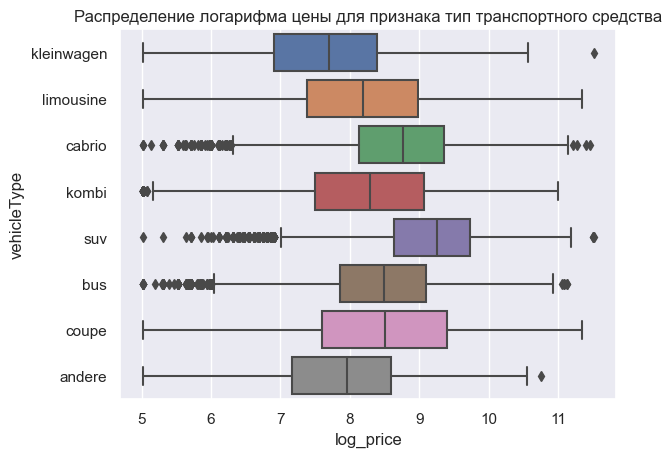

In [91]:
#далее посмотрим на boxplot
sns.boxplot(data=data_clean, x="log_price", y="vehicleType")
plt.title('Распределение логарифма цены для признака тип транспортного средства')
plt.show

Нельзя сказать, что ящики для каждого типа транспортного средства не лежат в одном ценовом интервале. Значит, цена автомобиля меняется в зависимости от его типа. Этот признак полезен для предсказания.

<function matplotlib.pyplot.show(close=None, block=None)>

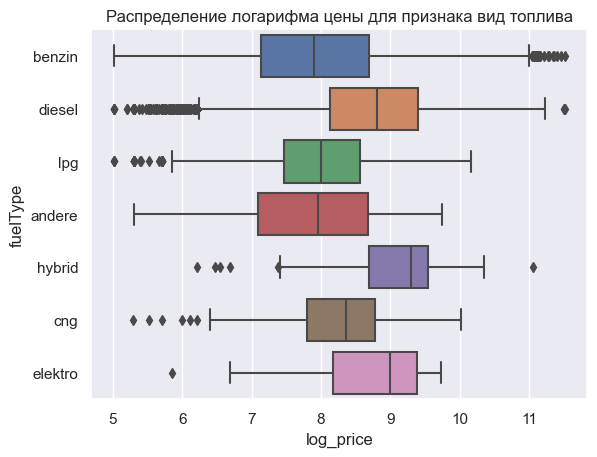

In [92]:
sns.boxplot(data=data_clean, x="log_price", y="fuelType")
plt.title('Распределение логарифма цены для признака вид топлива')
plt.show

В данном случаем все аналогично предыдущему, автомобили с разными типами топлива имеют разные ценовые интервалы.

<function matplotlib.pyplot.show(close=None, block=None)>

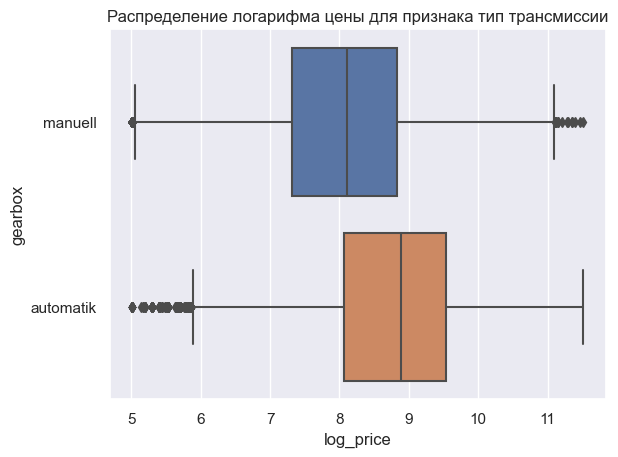

In [93]:
sns.boxplot(data=data_clean, x="log_price", y="gearbox")
plt.title('Распределение логарифма цены для признака тип трансмиссии')
plt.show

Исходя из полученного графика, мы можем утверждать, что вероятно автомобиль с механической трансмиссией будет дешевле автомобиля с автоматической трансмиссией.

<function matplotlib.pyplot.show(close=None, block=None)>

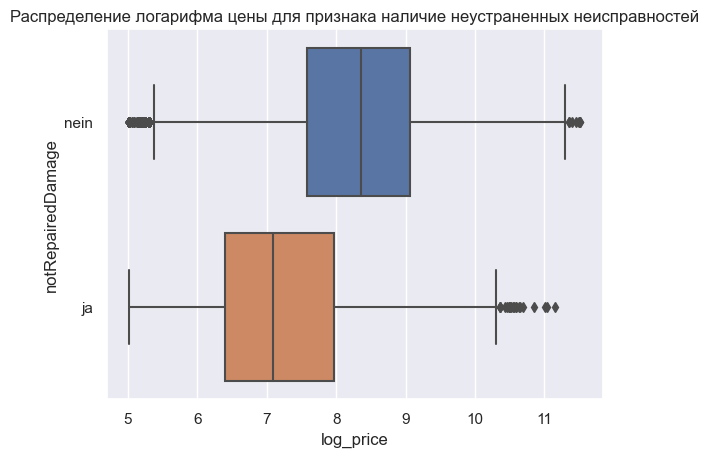

In [94]:
sns.boxplot(data=data_clean, x="log_price", y="notRepairedDamage")
plt.title('Распределение логарифма цены для признака наличие неустраненных неисправностей')
plt.show

Можно заметить, что цена автомобиля становится значительно ниже, если у него присутствуют неустраненные неисправности. Этот признак также будет полезен для анализа.

Нам будет полезно отмасштабировать числовые признаки, и закодировать при помощи OHE категориальные.

In [95]:
data_clean['bias'] = 1
other += ['bias']

x = data_clean[categorical + numeric + other]
y = data_clean['log_price']

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [97]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [98]:
y_train.reset_index(drop=True, inplace = True)
y_val.reset_index(drop=True, inplace = True)
y_test.reset_index(drop=True, inplace = True)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [99]:
R2 = []
train_loss = []
test_loss = []
iters = []

In [100]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
np.random.seed(5)
dimension = X_train.shape[1]
alphas = np.logspace(-2, 3, num = 30, base = 2)
loss = []
for i in alphas:
    descent_config = {'descent_name': 'full', 'kwargs': {
        'dimension': dimension, 'lambda_': i
    }}
    lm_van = LinearRegression(
          descent_config=descent_config, )

    lm_van.fit(X_train, y_train)
    loss.append(lm_van.calc_loss(X_val, y_val))
min_value = min(loss)
best_alpha_van = alphas[loss.index(min_value)]
print("Best lambda vanilla gradient = %.4f" % best_alpha_van)
descent_config = {'descent_name': 'full', 'kwargs': {
        'dimension': dimension, 'lambda_': best_alpha_van
    }}
lm_van = LinearRegression(
          descent_config=descent_config, )

lm_van.fit(X_train, y_train)
loss_train = lm_van.calc_loss(X_train, y_train)
loss_val = lm_van.calc_loss(X_val, y_val)
loss_test = lm_van.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_van.predict(X_test))
num_iter_van = len(lm_van.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter_van))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter_van)

Best lambda vanilla gradient = 1.9066
Train_loss = 0.2258
Val_loss = 0.2247
Test_loss = 0.2262
R2_test = 0.8013
Number of iterations  98


In [101]:
np.random.seed(5)
loss = []
for i in alphas:
    descent_config_1 = {'descent_name': 'stochastic', 'kwargs': {
        'dimension': dimension, 'lambda_': i
    }}
    lm_stochastic = LinearRegression(
          descent_config=descent_config_1, )

    lm_stochastic.fit(X_train, y_train)
    loss.append(lm_stochastic.calc_loss(X_val, y_val))
min_value = min(loss)
best_alpha_stochastic = alphas[loss.index(min_value)]
print("Best lambda stochastic gradient = %.4f" % best_alpha_stochastic)

descent_config_1 = {'descent_name': 'stochastic', 'kwargs': {
        'dimension': dimension, 'lambda_': best_alpha_stochastic
    }}
lm_stochastic = LinearRegression(
          descent_config=descent_config_1, )

lm_stochastic.fit(X_train, y_train)
loss_train = lm_stochastic.calc_loss(X_train, y_train)
loss_val = lm_stochastic.calc_loss(X_val, y_val)
loss_test = lm_stochastic.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_stochastic.predict(X_test))
num_iter_stochastic = len(lm_stochastic.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter_stochastic))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter_stochastic)

Best lambda stochastic gradient = 0.5121
Train_loss = 0.2739
Val_loss = 0.2701
Test_loss = 0.2758
R2_test = 0.7578
Number of iterations  181


In [102]:
np.random.seed(5)
loss = []
for i in alphas:
    descent_config_2 = {'descent_name': 'momentum', 'kwargs': {
        'dimension': dimension, 'lambda_': i
    }}
    lm_moment = LinearRegression(
          descent_config=descent_config_2, )

    lm_moment.fit(X_train, y_train)
    loss.append(lm_moment.calc_loss(X_val, y_val))
min_value = min(loss)
best_alpha_momentum = alphas[loss.index(min_value)]
print("Best lambda momentum = %.4f" % best_alpha_momentum)

descent_config_2 = {'descent_name': 'momentum', 'kwargs': {
        'dimension': dimension, 'lambda_': best_alpha_momentum
    }}
lm_momentum = LinearRegression(
          descent_config=descent_config_2, )

lm_momentum.fit(X_train, y_train)
loss_train = lm_momentum.calc_loss(X_train, y_train)
loss_val = lm_momentum.calc_loss(X_val, y_val)
loss_test = lm_momentum.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_momentum.predict(X_test))
num_iter_momentum = len(lm_momentum.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter_momentum))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter_momentum)

Best lambda momentum = 1.1821
Train_loss = 0.1974
Val_loss = 0.1962
Test_loss = 0.1972
R2_test = 0.8267
Number of iterations  137


In [103]:
np.random.seed(5)
loss = []
for i in alphas:
    descent_config_3 = {'descent_name': 'adam', 'kwargs': {
        'dimension': dimension, 'lambda_': i
    }}
    lm_adam = LinearRegression(
          descent_config=descent_config_3, )

    lm_adam.fit(X_train, y_train)
    loss.append(lm_adam.calc_loss(X_val, y_val))
min_value = min(loss)
best_alpha_adam = alphas[loss.index(min_value)]
print("Best lambda adam = %.4f" % best_alpha_adam)

descent_config_3 = {'descent_name': 'adam', 'kwargs': {
        'dimension': dimension, 'lambda_': best_alpha_adam
    }}
lm_adam = LinearRegression(
          descent_config=descent_config_3, )

lm_adam.fit(X_train, y_train)
loss_train = lm_adam.calc_loss(X_train, y_train)
loss_val = lm_adam.calc_loss(X_val, y_val)
loss_test = lm_adam.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_adam.predict(X_test))
num_iter_adam = len(lm_adam.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ",   int(num_iter_adam))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter_adam)

Best lambda adam = 1.3322
Train_loss = 0.1827
Val_loss = 0.1824
Test_loss = 0.1823
R2_test = 0.8398
Number of iterations  166


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

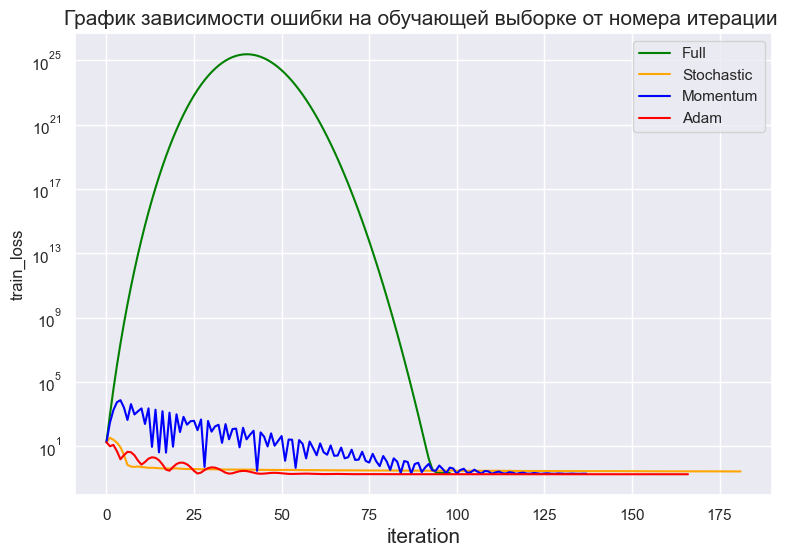

In [104]:
# YOUR CODE:
iter_full = list(np.arange(0, iters[0]+1))
iter_stoch = list(np.arange(0, iters[1]+1))
iter_moment = list(np.arange(0, iters[2]+1))
iter_adam = list(np.arange(0, iters[3]+1))
full = list(lm_van.loss_history)
stoch = list(lm_stochastic.loss_history)
moment = list(lm_momentum.loss_history)
adam = list(lm_adam.loss_history)
plt.figure(figsize=(9,6))
plt.plot(iter_full, full, color = 'green', label = 'Full')
plt.plot(iter_stoch, stoch, color = 'orange', label = 'Stochastic')
plt.plot(iter_moment, moment, color = 'blue', label = 'Momentum')
plt.plot(iter_adam, adam, color = 'red', label = 'Adam')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('train_loss', fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера итерации ', fontsize = 15)
plt.yscale("log")
plt.legend()

На графике можно заметить, что обычный градиентный спуск сначала расходится, но потом ошибка начинает убывать и достигает минимума. Это может быть вызвано выбором неправильно скорости обучения, можно поменять параметры s0 и p. Стохастический градиентный спуск имеет самую лучшую траектори, просто убывающую, она не колеблется в отличии от Adam и метода инерции.Наибольшее количество итераций потребовалось методу Adam.

`### ваше решение тут ###`

In [105]:
table = pd.DataFrame()
table['type'] = ['Full', 'Stochastic', 'Momentum', 'Adam']
table['R2_test'] = R2
table['train_loss'] = train_loss
table['test_loss'] = test_loss
table['num_of_iters'] = iters
table.set_index('type', inplace = True)
table

,R2_test,train_loss,test_loss,num_of_iters
type,,,,
Full,0.801283,0.225845,0.226202,98
Stochastic,0.757754,0.273925,0.275752,181
Momentum,0.826745,0.197420,0.197218,137
Adam,0.839842,0.182718,0.182310,166


Необходимо заметить, что стохастический градиентный спуск характеризуется самым низким качеством, для него значение ошибки и на обучении, и на тесте самые высокие, а R2 самый низкий. Это можно объяснить тем, что в этом методе на каждой итерации используется не вся выборка, а только ее часть, этот факт также объясняет и то, что этот метод имеет наибольшее количество итераций. Самое маленькое количество итераций у полного градиентного спуска, так как он делает шаг, находя градиент по всей выборке, а также в отличии от Adam и метода инерции не учитывает градиенты нескольких последних итераций. Самое лучшее качество имеют Momentum и Adam, так как они, как уже было сказано, делают шаг, учитывая градиенты с прошлых итераций. В случае Adam мы также запоминаем, насколько до этого обновляли веса, поэтому для каждого признака у нас свой шаг градиентного спуска. Ранее мы делали OHE, у нас много признаков, которые имеют значения 0, поэтому применение метода Adam дает наилучший результат.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [106]:
import time
np.random.seed(5)
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
num_iters_mean = []
time_mean = []
for i in batch_sizes:
    iterat = []
    times = []
    for j in range(10):
        descent_config_1 = {'descent_name': 'stochastic', 'kwargs': {
          'dimension': dimension, 'lambda_': best_alpha_stochastic, 'batch_size': i }}
        lm_stochastic = LinearRegression(
             descent_config=descent_config_1, )
        
        start = time.time()
        lm_stochastic.fit(X_train, y_train)  
        end = time.time()
        t = end - start
        it = len(lm_stochastic.loss_history) - 1
        iterat.append(it)
        times.append(t)
    mean_t = np.array(times).mean()
    mean_i = np.array(iterat).mean()
    num_iters_mean.append(mean_i)
    time_mean .append(mean_t)

`### ваше решение тут ###`

Text(0.5, 1.0, 'График изменения количества итераций до сходимости в зависимоти от размера батча')

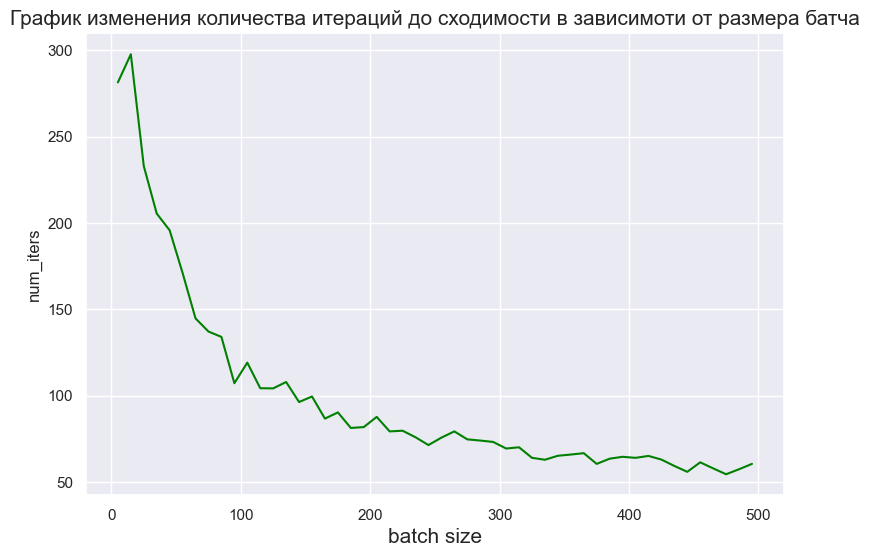

In [107]:
plt.figure(figsize=(9,6))
plt.plot(batch_sizes, num_iters_mean, color = 'green')
plt.xlabel('batch size', fontsize = 15)
plt.ylabel('num_iters', fontsize = 12)
plt.title('График изменения количества итераций до сходимости в зависимоти от размера батча', fontsize = 15)

Text(0.5, 1.0, 'График изменения времени до сходимости в зависимоти от размера батча')

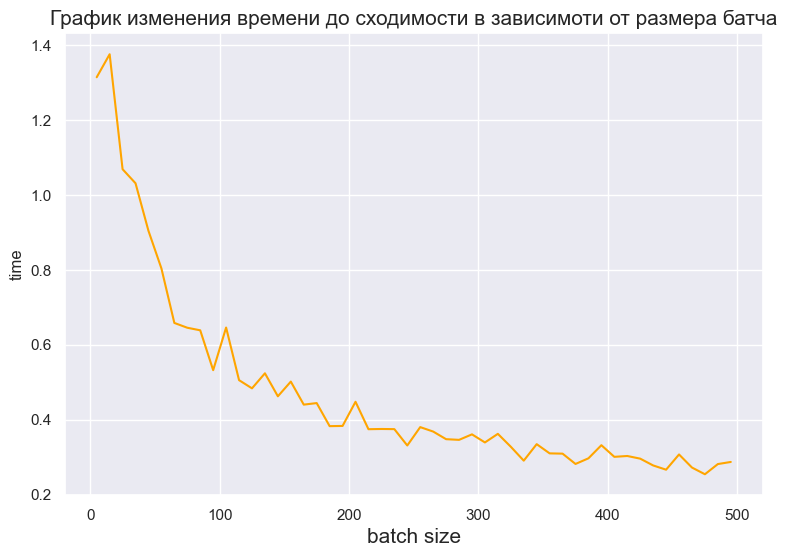

In [108]:
plt.figure(figsize=(9,6))
plt.plot(batch_sizes, time_mean, color = 'orange')
plt.xlabel('batch size', fontsize = 15)
plt.ylabel('time', fontsize = 12)
plt.title('График изменения времени до сходимости в зависимоти от размера батча', fontsize = 15)

Исходя из графиков можно сделать вывод, что чем больше размер батча, тем меньше количество итераций  и времени требуется на спуск. Количество итераций уменьшается, так как наш набор данных, по которому мы считаем градиенты становится более репрезентативным, поэтому мы на каждом шаге движемся в более точном направдении. Аналогично и для времени, но вероятнее всего связь времени и размера батча не всегда будет отрицательной, так как если наш батч будет очень большим или мы будем делать полный градиентный спуск, то будем счиатать градиент по большому количеству объектов, а значит потратим больше времени.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

https://contest.yandex.ru/contest/54610/run-report/96299581/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [109]:
#YOUR CODE:
np.random.seed(5)
alphas = np.logspace(-2, 3, num = 10, base = 2)
mu = np.logspace(-2, 3, num = 10, base = 10)
loss = {}
for i in alphas:
    for j in mu: 
        descent_config = {'descent_name': 'full', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': i, 'mu' : j
          }}
        lm_van_reg = LinearRegression(
               descent_config=descent_config, )

        lm_van_reg.fit(X_train, y_train)
        loss[(i, j)] = lm_van_reg.calc_loss(X_val, y_val)
min_ = min(loss, key = loss.get)
best_alpha_van_reg = min_[0]
print("Best lambda vanilla gradient reg = %.4f" % best_alpha_van_reg)
best_mu_van_reg = min_[1]
print("Best mu vanilla gradient reg = %.4f" % best_mu_van_reg)
descent_config = {'descent_name': 'full', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': best_alpha_van_reg, 'mu' : best_mu_van_reg
          }}
lm_van_reg = LinearRegression(
           descent_config=descent_config, )

lm_van_reg.fit(X_train, y_train)
loss_train = lm_van_reg.calc_loss(X_train, y_train)
loss_val = lm_van_reg.calc_loss(X_val, y_val)
loss_test = lm_van_reg.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_van_reg.predict(X_test))
num_iter = len(lm_van_reg.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter)

Best lambda vanilla gradient reg = 1.7145
Best mu vanilla gradient reg = 0.0359
Train_loss = 0.2108
Val_loss = 0.2105
Test_loss = 0.2101
R2_test = 0.8154
Number of iterations  215


In [110]:
np.random.seed(5)
loss = {}
for i in alphas:
    for j in mu: 
        descent_config_1 = {'descent_name': 'stochastic', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': i, 'mu' : j
          }}
        lm_stoch_reg = LinearRegression(
               descent_config=descent_config_1, )

        lm_stoch_reg.fit(X_train, y_train)
        loss[(i, j)] = lm_stoch_reg.calc_loss(X_val, y_val)
min_ = min(loss, key = loss.get)
best_alpha_stoch_reg = min_[0]
print("Best lambda stochastic gradient reg = %.4f" % best_alpha_stoch_reg)
best_mu_stoch_reg = min_[1]
print("Best mu stochastic gradient reg = %.4f" % best_mu_stoch_reg)
descent_config_1 = {'descent_name': 'stochastic', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': best_alpha_stoch_reg, 'mu' : best_mu_stoch_reg
          }}
lm_stoch_reg = LinearRegression(
           descent_config=descent_config_1, )

lm_stoch_reg.fit(X_train, y_train)
loss_train = lm_stoch_reg.calc_loss(X_train, y_train)
loss_val = lm_stoch_reg.calc_loss(X_val, y_val)
loss_test = lm_stoch_reg.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_stoch_reg.predict(X_test))
num_iter = len(lm_stoch_reg.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter)

Best lambda stochastic gradient reg = 0.5400
Best mu stochastic gradient reg = 0.0359
Train_loss = 0.2342
Val_loss = 0.2343
Test_loss = 0.2327
R2_test = 0.7956
Number of iterations  282


In [111]:
np.random.seed(5)
loss = {}
for i in alphas:
    for j in mu: 
        descent_config_2 = {'descent_name': 'momentum', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': i, 'mu' : j
          }}
        lm_momen_reg = LinearRegression(
               descent_config=descent_config_2, )

        lm_momen_reg.fit(X_train, y_train)
        loss[(i, j)] = lm_momen_reg.calc_loss(X_val, y_val)
min_ = min(loss, key = loss.get)
best_alpha_momen_reg = min_[0]
print("Best lambda momentum gradient reg = %.4f" % best_alpha_momen_reg)
best_mu_momen_reg = min_[1]
print("Best mu momentum gradient reg = %.4f" % best_mu_momen_reg)
descent_config_2 = {'descent_name': 'momentum', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': best_alpha_momen_reg, 'mu' : best_mu_momen_reg
          }}
lm_momen_reg = LinearRegression(
           descent_config=descent_config_2, )

lm_momen_reg.fit(X_train, y_train)
loss_train = lm_momen_reg.calc_loss(X_train, y_train)
loss_val = lm_momen_reg.calc_loss(X_val, y_val)
loss_test = lm_momen_reg.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_momen_reg.predict(X_test))
num_iter = len(lm_momen_reg.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter)

Best lambda momentum gradient reg = 0.7937
Best mu momentum gradient reg = 0.0100
Train_loss = 0.1973
Val_loss = 0.1969
Test_loss = 0.1967
R2_test = 0.8272
Number of iterations  188


In [112]:
np.random.seed(5)
loss = {}
for i in alphas:
    for j in mu: 
        descent_config_3 = {'descent_name': 'adam', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': i, 'mu' : j
          }}
        lm_adam_reg = LinearRegression(
               descent_config=descent_config_3, )

        lm_adam_reg.fit(X_train, y_train)
        loss[(i, j)] = lm_adam_reg.calc_loss(X_val, y_val)
min_ = min(loss, key = loss.get)
best_alpha_adam_reg = min_[0]
print("Best lambda adam gradient reg = %.4f" % best_alpha_adam_reg)
best_mu_adam_reg = min_[1]
print("Best mu adam gradient reg = %.4f" % best_mu_adam_reg)
descent_config_3 = {'descent_name': 'adam', 'regularized' : True, 'kwargs': {
            'dimension': dimension, 'lambda_': best_alpha_adam_reg, 'mu' : best_mu_adam_reg
          }}
lm_adam_reg = LinearRegression(
           descent_config=descent_config_3, )

lm_adam_reg.fit(X_train, y_train)
loss_train = lm_adam_reg.calc_loss(X_train, y_train)
loss_val = lm_adam_reg.calc_loss(X_val, y_val)
loss_test = lm_adam_reg.calc_loss(X_test, y_test)
R2_test = r2_score(y_test, lm_adam_reg.predict(X_test))
num_iter = len(lm_adam_reg.loss_history)-1
print("Train_loss = %.4f" % loss_train)
print("Val_loss = %.4f" % loss_val)
print("Test_loss = %.4f" % loss_test)
print("R2_test = %.4f" % R2_test)
print("Number of iterations ", int(num_iter))
R2.append(R2_test)
train_loss.append(loss_train)
test_loss.append(loss_test)
iters.append(num_iter)

Best lambda adam gradient reg = 5.4432
Best mu adam gradient reg = 0.0100
Train_loss = 0.2037
Val_loss = 0.2044
Test_loss = 0.2027
R2_test = 0.8219
Number of iterations  163


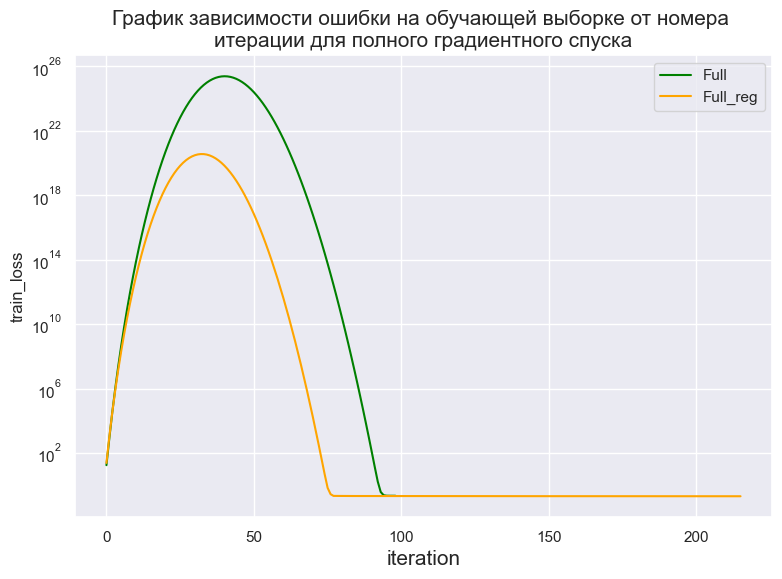

In [113]:
#iter_full = list(np.arange(0, iters[0]+1))
iter_full_reg = list(np.arange(0, iters[4]+1))
#full = list(lm_van.loss_history)
full_reg = list(lm_van_reg.loss_history)
plt.figure(figsize=(9,6))
plt.plot(iter_full, full, color = 'green', label = 'Full')
plt.plot(iter_full_reg, full_reg, color = 'orange', label = 'Full_reg')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('train_loss', fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера \nитерации для полного градиентного спуска', fontsize = 15)
plt.yscale("log")
plt.legend()

В данном случае регуляризация уменьшила ошибку, но при этом количество итераций до сходимости увеличилось.

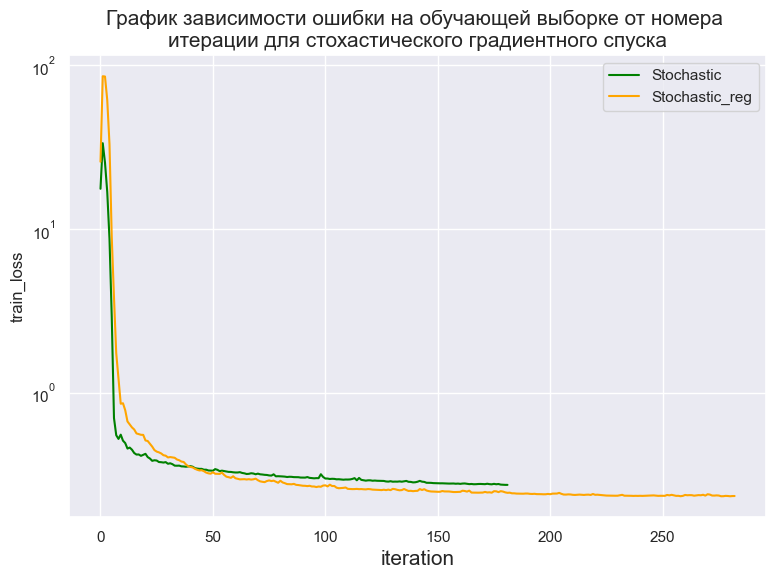

In [114]:
#iter_stoch = list(np.arange(0, iters[1]+1))
iter_stoch_reg = list(np.arange(0, iters[5]+1))
#stoch = list(lm_stochastic.loss_history)
stoch_reg = list(lm_stoch_reg.loss_history)
plt.figure(figsize=(9,6))
plt.plot(iter_stoch, stoch, color = 'green', label = 'Stochastic')
plt.plot(iter_stoch_reg, stoch_reg, color = 'orange', label = 'Stochastic_reg')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('train_loss', fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера \nитерации для стохастического градиентного спуска', 
          fontsize = 15)
plt.yscale("log")
plt.legend()

На этом графике аналогичная ситуация, регуляризация в итоге уменьшила ошибку, но количество итераций до сходимости увеличилось.

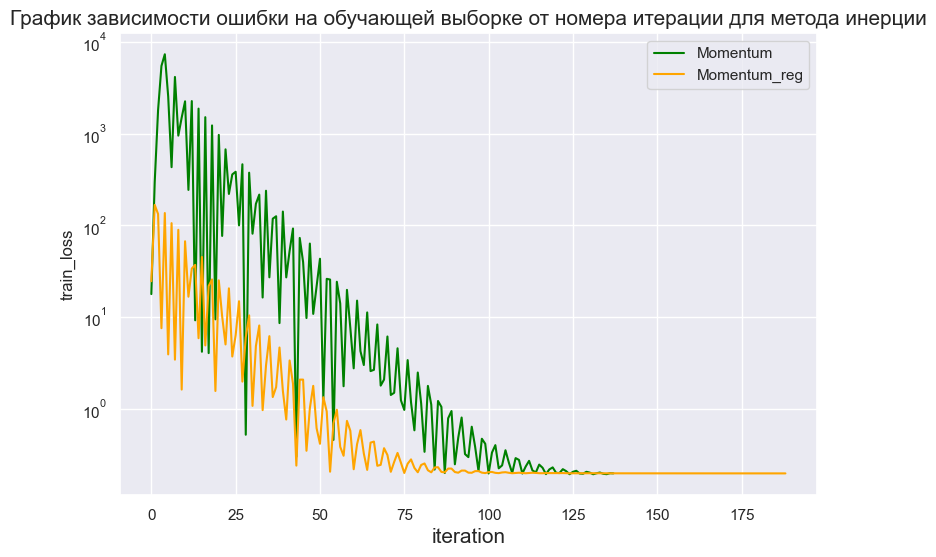

In [115]:
#iter_moment = list(np.arange(0, iters[2]+1))
iter_moment_reg = list(np.arange(0, iters[6]+1))
#moment = list(lm_momentum.loss_history)
moment_reg = list(lm_momen_reg.loss_history)
plt.figure(figsize=(9,6))
plt.plot(iter_moment, moment, color = 'green', label = 'Momentum')
plt.plot(iter_moment_reg, moment_reg, color = 'orange', label = 'Momentum_reg')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('train_loss', fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера итерации для метода инерции', 
          fontsize = 15)
plt.yscale("log")
plt.legend()

В случае метода инерции можно сделать такие же выводы, как и в полном градиентном спуске, и в стохастическом.

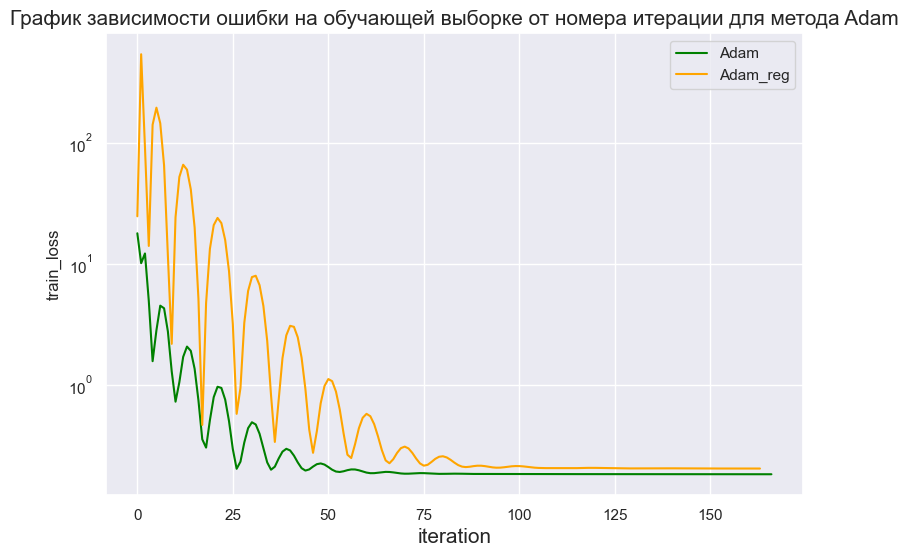

In [116]:
#iter_adam = list(np.arange(0, iters[3]+1))
iter_adam_reg = list(np.arange(0, iters[7]+1))
#adam = list(lm_adam.loss_history)
adam_reg = list(lm_adam_reg.loss_history)
plt.figure(figsize=(9,6))
plt.plot(iter_adam, adam, color = 'green', label = 'Adam')
plt.plot(iter_adam_reg, adam_reg, color = 'orange', label = 'Adam_reg')
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('train_loss', fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера итерации для метода Adam', 
          fontsize = 15)
plt.yscale("log")
plt.legend()

Для метода Adam мы наблюдаем противоположную ситуацию, здесь ошибка наоборот выросла. Возможно, дело в параметрах и необходимо взять другую логарифмическую сетку.

`### ваше решение тут ###`

In [117]:
table = pd.DataFrame()
table['type'] = ['Full', 'Stochastic', 'Momentum', 'Adam', 'Full_reg', 'Stochastic_reg', 'Momentum_reg', 'Adam_reg']
table['R2_test'] = R2
table['train_loss'] = train_loss
table['test_loss'] = test_loss
table['num_of_iters'] = iters
table.set_index('type', inplace = True)
table

,R2_test,train_loss,test_loss,num_of_iters
type,,,,
Full,0.801283,0.225845,0.226202,98
Stochastic,0.757754,0.273925,0.275752,181
Momentum,0.826745,0.197420,0.197218,137
Adam,0.839842,0.182718,0.182310,166
Full_reg,0.815444,0.210846,0.210083,215
Stochastic_reg,0.795572,0.234206,0.232703,282
Momentum_reg,0.827242,0.197293,0.196653,188
Adam_reg,0.821917,0.203657,0.202714,163


После введения регуляризации количество итераций до сходимости увеличилось для всех методов (кроме Adam). Это можно объяснить тем, что теперь в нашей функции потерь есть добавка, которая 'отдаляет' нас от минимума на каждой итерации. Для полного и стохастического градиентных спусков можно заметить улучшение качества. Вероятно, эти модели были переобучены, а регуляризация решила эту проблему. Для методов Adam и Momentum мы не наблюдаем улучшений в R2, для Adam даже увеличилась ошибка на обучении и на тесте. Как уже было сказано выше, возможно, качество было бы лучше, если использовать другую логарифмическую сетку и подобрать другие параметры.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
   L(a, y) =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

$$
   \sum_{i = 1}^{\ell}
    \log\left(\cosh(Xw - y)\right). 
$$   

$$
    \nabla_{w}Q(w) = tanh(Xw-Y)X
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [118]:
np.random.seed(5)
models = ['full', 'stochastic', 'momentum', 'adam']
alphas = np.logspace(-2, 3, num = 30, base = 2)
best = []
for i in models:
    loss = []
    for j in alphas:
        descent_config = {'descent_name': i, 'loss_function': 'LogCosh', 'kwargs': {
            'dimension': dimension, 'lambda_': j, 
          }}
        lm = LinearRegression(
          descent_config=descent_config, )
        lm.fit(X_train, y_train)
        loss.append(lm.calc_loss(X_val, y_val))
    min_value = min(loss)
    best_alpha = alphas[loss.index(min_value)]
    best.append(best_alpha)
for p in range(4):
    print("Best lambda " + models[p] + " gradient = %.4f" % best[p])

Best lambda full gradient = 1.9066
Best lambda stochastic gradient = 0.6504
Best lambda momentum gradient = 1.1821
Best lambda adam gradient = 1.9066


In [119]:
np.random.seed(5)
for q in range(4):
    descent_config = {'descent_name': models[q], 'loss_function': 'LogCosh', 'kwargs': {
            'dimension': dimension, 'lambda_': best[q], 
             }}
    lm_new = LinearRegression(
            descent_config=descent_config, )
    lm_new.fit(X_train, y_train)
    loss_train = lm_new.calc_loss(X_train, y_train)
    loss_val = lm_new.calc_loss(X_val, y_val)
    loss_test = lm_new.calc_loss(X_test, y_test)
    R2_test = r2_score(y_test, lm_new.predict(X_test))
    num_iter = len(lm_new.loss_history)-1
    print(models[q] + ' gradient results:')
    print("Train_loss = %.4f" % loss_train)
    print("Val_loss = %.4f" % loss_val)
    print("Test_loss = %.4f" % loss_test)
    print("R2_test = %.4f" % R2_test)
    print("Number of iterations ", int(num_iter), '\n')
    R2.append(R2_test)
    train_loss.append(loss_train)
    test_loss.append(loss_test)
    iters.append(num_iter)

full gradient results:
Train_loss = 0.2294
Val_loss = 0.2306
Test_loss = 0.2300
R2_test = 0.7980
Number of iterations  98 

stochastic gradient results:
Train_loss = 0.3010
Val_loss = 0.2996
Test_loss = 0.2998
R2_test = 0.7366
Number of iterations  300 

momentum gradient results:
Train_loss = 0.1983
Val_loss = 0.1983
Test_loss = 0.1977
R2_test = 0.8263
Number of iterations  137 

adam gradient results:
Train_loss = 0.1829
Val_loss = 0.1827
Test_loss = 0.1823
R2_test = 0.8399
Number of iterations  127 



In [120]:
table = pd.DataFrame()
table['type'] = ['Full', 'Stochastic', 'Momentum', 'Adam', 'Full_reg', 'Stochastic_reg', 'Momentum_reg', 'Adam_reg',
                 'Full_Cosh', 'Stoch_Cosh', 'Momentum_Cosh', 'Adam_Cosh']
table['R2_test'] = R2
table['train_loss'] = train_loss
table['test_loss'] = test_loss
table['num_of_iters'] = iters
table.set_index('type', inplace = True)
table.sort_index(inplace = True)
table

,R2_test,train_loss,test_loss,num_of_iters
type,,,,
Adam,0.839842,0.182718,0.182310,166
Adam_Cosh,0.839863,0.182867,0.182287,127
Adam_reg,0.821917,0.203657,0.202714,163
Full,0.801283,0.225845,0.226202,98
Full_Cosh,0.797971,0.229420,0.229972,98
Full_reg,0.815444,0.210846,0.210083,215
Momentum,0.826745,0.197420,0.197218,137
Momentum_Cosh,0.826345,0.198313,0.197674,137
Momentum_reg,0.827242,0.197293,0.196653,188


Можно заметить, что использование новой функции потерь привело к увеличению значений R2 для методов Adam и Momentum (хотя изменение не очень большое), для полного и стохастического градиентных спусков R2 наоборот снизилось. Аналогично и для значений ошибки, для Adam Momentum они стали меньше и на обучении, и на тесте. Для стохастического и полного больше.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [32]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [33]:
# YOUR CODE: